In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def duration_master_fn(d, slope=1, clip=None):
    if d < round(365*1.5):
        return 1
    else:
        y1_slp1 = 1
        y2_slp1 = 2 - 183/365.
        x1_slp1 = round(365*1.5)
        x2_slp1 = 365*2
        m = (y2_slp1 - y1_slp1) / (x2_slp1 - x1_slp1)
        m *= slope
        # y-y1 = m*(x-x1)
        y = m*(d - x1_slp1) + y1_slp1
        if clip is not None:
            if y > clip:
                y = clip
        return y
    
# define duration multiplier callables - we need to redefine these callables to be compatible w/ mechaFIL
def no_sdm(d):
    return 1

def duration_m_slp_1_noclip(d):
    return duration_master_fn(d, slope=1, clip=None)

def duration_m_slp_0_285_noclip(d):
    return duration_master_fn(d, slope=0.285, clip=None)

In [5]:
d = np.linspace(1,365*5)
sdm_1 = [duration_m_slp_1_noclip(x) for x in d]
sdm_2 = [duration_m_slp_0_285_noclip(x) for x in d]

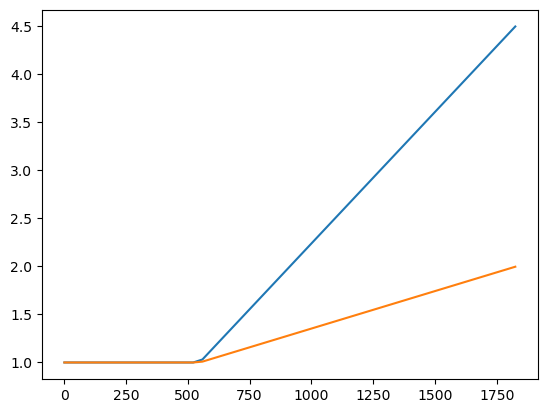

In [6]:
plt.figure()
plt.plot(d, sdm_1)
plt.plot(d, sdm_2)